<p style="text-align: center"><font size="7"> TP1 </font></p> 

<p style="text-align: center"><font size="5"> Guines Antoine / Langolff Clément </font></p> 

Dans ce tp, on veut comparer trois schémas numériques pour les résolutions des équations diffèrentielles
$$\begin{cases}
x'(t) & =f(t,x(t))\;pour\,t\in[0,T]\\
x(0) & =x_{0}
\end{cases}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

#### fonction Euler Explicit



In [2]:
def euler_explicite(f, y0, t):
        d = len(y0)
        n = len(t)
        y = np.zeros((d,n))
        y[:,0] = y0
        dt = t[1] - t[0]
        
        for i in range(n-1):
            y[:,i+1] = y[:,i] + dt * f(t[i],y[:,i])
            
        return y
            

#### fonction Euler implicite

La méthode d'Euler nécessite de résoudre un système pour trouver les coordonées du point suivant.
On dispose de la fonction f : 
$$
f(t,x) = x - t^{2}+1
$$
On résout alors :
$$
\begin{align*}
y_{i+1} & =y_{i}+h(y_{i+1}-t_{i}^{2}+1)\\
\iff y_{i+1} & =\frac{y_{i}-h(t_{i}^{2}-1)}{1-h}
\end{align*}
$$

Pour des raisons d'éfficacité numérique (en sachant que le pas ne varie pas pour ce cas là) nous posons $beta = \frac{1}{1 - h} $

In [3]:
def euler_implicite(f, y0, t):
        d = len(y0)
        n = len(t)
        y = np.zeros((d,n))
        y[:,0] = y0
        dt = t[1] - t[0]
        beta = 1. / (1. - dt)
        
        for i in range(n-1):
            y[:,i+1] = (y[:,i] - dt * (t[i]**2 - 1))* beta 
            
        return y


#### Méthode du point milieu

In [4]:
def point_milieu(f, y0, t):
        d = len(y0)
        n = len(t)
        y = np.zeros((d,n))
        y[:,0] = y0
        dt = t[1]-t[0]
        m = dt / 2
        
        for i in range(n-1):
            y[:,i+1] = y[:,i] + dt * f(t[i] + m, y[:,i] + m * f(t[i],y[:,i]))
            
        return y


### EXERCICE 1

On dispose de la fonction f : 
$$
f(t,x) = x - t^{2}+1
$$

In [5]:
def dynamique(t, x):
    return x - t**2 + 1

Cette fonction dispose d'une solution que l'on peut résoudre analytiquement. 
Réécrivons l'équation sous la forme   
$$
\begin{align*}
x'(t)-x(t) & =-t^{2}+1
\end{align*}
$$
Cherchons tout d'abord une solution homogène

$$
\begin{align*}
x'(t)-x(t) & =0\\
\iff x_{h}(t)= & Ce^{t}
\end{align*}
$$

Cherchons ensuite une solution particulière. 
Soit $Q(t)$ le polynôme de degrès 2. 
$$Q(t)=at^{2}+bt+c$$
On a alors 
$$
Q'(t)-Q(t)=-at^{2}+t(2a-b)+b-c
$$
En résolvant le système, on trouve $a=1,b=2,c=1$ et donc $Q(t)=(t+1)^{2}$  
Ainsi les solutions sont de la forme 
$$ 
x(t)=Ce^{t}+(t+1)^{2}
$$  
De plus en prenant $x_{0}=\frac{1}{2}$, on trouve $C=-\frac{1}{2}$  
  
Finalement 
$$
x(t)=-\frac{e^{t}}{2}+(t+1)^{2}
$$

In [6]:
def X(t):
    return (1+t)**2 - np.exp(t)*0.5

In [7]:
T = 2
N = 20
temps = np.linspace(0,T,N+1)
x0 = np.array([0.5])


EE = euler_explicite(dynamique, x0, temps)
EE = EE[0,:]

EI = euler_implicite(dynamique, x0, temps)
EI = EI[0,:]

PM = point_milieu(dynamique, x0, temps)
PM = PM[0,:]

solExacte = X(temps)

#### Graphe des résultats

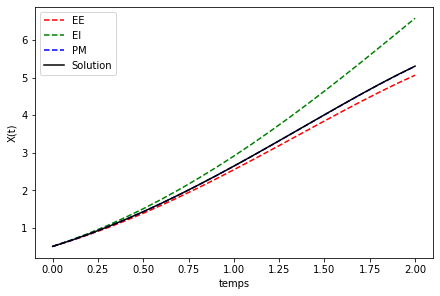

In [8]:
fig, ax = plt.subplots(layout='constrained')
ax.set_ylabel('X(t)')
ax.set_xlabel('temps')
plt.plot(temps,EE,'r--', label='EE')
plt.plot(temps,EI,'g--', label='EI')
plt.plot(temps,PM,'b--', label='PM')
plt.plot(temps,solExacte,'k-',label='Solution')

plt.legend()
plt.show()

On peut voir que la méthode la plus efficace semble être la méthode des points milieu.  
Vérifions le en calculant l'erreur

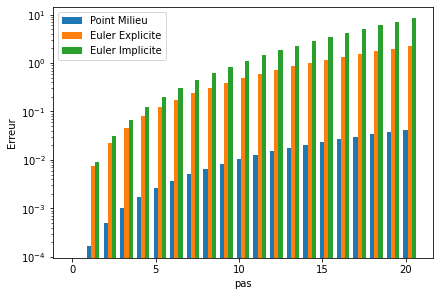

In [9]:
pourcentEE = np.abs(np.cumsum(np.abs(EE-solExacte)) )
pourcentEI = np.abs(np.cumsum(np.abs(EI-solExacte)) )
pourcentPM = np.abs(np.cumsum(np.abs(PM-solExacte)) )


algo = {
    'Point Milieu': pourcentPM,
    'Euler Explicite': pourcentEE,
    'Euler Implicite': pourcentEI,
}


width = 0.25 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
x = np.arange(N+1)
for ALGO, err in algo.items():
    offset = width * multiplier
    rects = ax.bar(x + offset,err, width, label=ALGO)
    multiplier += 1

ax.set_ylabel('Erreur')
ax.set_xlabel('pas')
ax.legend(loc='upper left')
ax.set_yscale('log')

plt.show()


In [10]:
TabErr = np.zeros((6,3))

x0 = np.array([0.5])
i = 0

TabP = np.zeros((6,3))
TabP[0,:] = None


for N in (20,40,80,160,320,640):
    temps = np.linspace(0,T,N+1)
    
    EE = euler_explicite(dynamique, x0, temps)
    EE = EE[0,:]

    EI = euler_implicite(dynamique, x0, temps)
    EI = EI[0,:]

    PM = point_milieu(dynamique, x0, temps)
    PM = PM[0,:]
    
    solExacte = X(temps)
    
    errEE = np.mean(np.abs(EE - solExacte)) 
    errEI = np.mean(np.abs(EI - solExacte)) 
    errPM = np.mean(np.abs(PM - solExacte)) 
    
    TabErr[i,:] = np.array([errEE,errEI,errPM])
    
    if i > 0 :
        TabP[i,:] = np.log(TabErr[i-1,:] / TabErr[i,:]) / np.log(2)
    
    i+=1
    

errEE = TabErr[:,0]
errEI = TabErr[:,1]
errPM = TabErr[:,2]

In [11]:
TabP = np.round(TabP)

titre = np.array(["N","err Euler Exp","err Euler Impl","err Point Milieu","p EE","p EI","p PM"])
tabN = np.array([20,40,80,160,320,640]) 


Tres = np.array([tabN,errEE,errEI,errPM,TabP[:,0],TabP[:,1],TabP[:,2]]).T

Tres = np.concatenate(([titre],Tres))
print(tabulate(Tres,tablefmt='fancy_grid'))

╒═══════╤═══════════════════════╤══════════════════════╤════════════════════════╤══════╤══════╤══════╕
│ N     │ err Euler Exp         │ err Euler Impl       │ err Point Milieu       │ p EE │ p EI │ p PM │
├───────┼───────────────────────┼──────────────────────┼────────────────────────┼──────┼──────┼──────┤
│ 20.0  │ 0.1063018340415501    │ 0.399814673178073    │ 0.00196466669294728    │ nan  │ nan  │ nan  │
├───────┼───────────────────────┼──────────────────────┼────────────────────────┼──────┼──────┼──────┤
│ 40.0  │ 0.05513986907399138   │ 0.18762223384799395  │ 0.00049480222613059    │ 1.0  │ 1.0  │ 2.0  │
├───────┼───────────────────────┼──────────────────────┼────────────────────────┼──────┼──────┼──────┤
│ 80.0  │ 0.028097605475915707  │ 0.09101196834608606  │ 0.00012408892749388373 │ 1.0  │ 1.0  │ 2.0  │
├───────┼───────────────────────┼──────────────────────┼────────────────────────┼──────┼──────┼──────┤
│ 160.0 │ 0.014184822277913428  │ 0.04483681325542674  │ 3.10663827511653

On déduit de ce tableau que les méthodes D'Euler sont d'ordre 1 tandis que la méthode des points milieu est d'ordre 2.

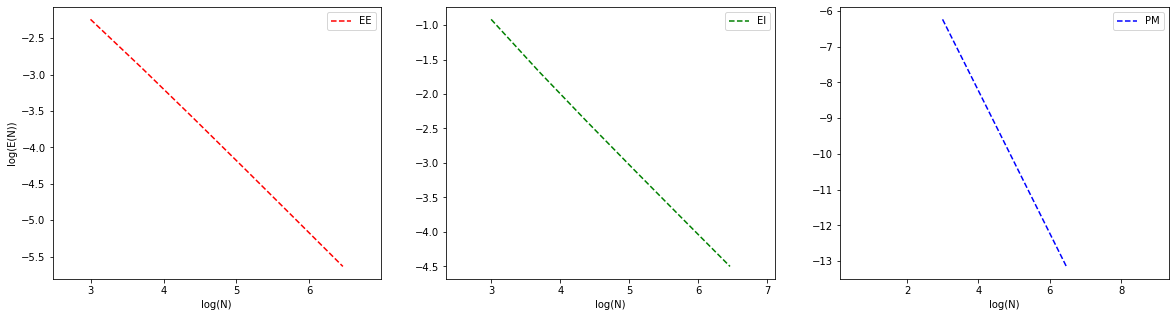

In [12]:
n = np.log(np.array([20,40,80,160,320,640]))

fig , axs = plt.subplots(1,3,figsize = (20,5))


axs[0].plot(n,np.log(errEE),'r--',label='EE')
axs[0].axis('equal')
axs[0].set_ylabel('log(E(N))')
axs[0].set_xlabel('log(N)')
axs[0].legend()

axs[1].plot(n,np.log(errEI),'g--',label='EI')
axs[1].axis('equal')
axs[1].set_xlabel('log(N)')
axs[1].legend()

axs[2].plot(n,np.log(errPM),'b--',label='PM')
axs[2].axis('equal')
axs[2].set_xlabel('log(N)')
axs[2].legend()




plt.show()

### Exercice 2 

1- 
La dynamique associée au système différentiel (1) est une fonction
$f:\mathbb{R}^{2}\rightarrow\mathbb{R}^{2}$ définie par :

$$
f\left(\begin{matrix}x\\
y
\end{matrix}\right)=\left(\begin{matrix}-bxy\\
bxy-gy
\end{matrix}\right)
$$

L'implémentation de la dynamique donne le code présent ci-dessous :

In [13]:
def dynamique_SIR(t, y):
        S,I = y
        dS = -b*S*I
        dI = b*S*I - g*I
        return np.array([dS,dI])


2- Voici ci-dessous le code permettant la résolution du système différentiel par les méthodes (EE) et (PM) pour N = 101 points.

In [14]:
S0 = 0.9
I0 = 0.1
Y0 = np.array([S0,I0])
T= 100
N = 101
b = 0.3
g = 0.1
C0 = I0 + S0 - (g / b) * np.log(S0)
temps = np.linspace(0,T,N+1)
EE_SIR = euler_explicite(dynamique_SIR, Y0, temps)
PM_SIR = point_milieu(dynamique_SIR, Y0, temps)


3- Traçons la courbe paramétrée (2) qui correspond à la solution exacte de (1).

In [15]:
def sol_exacte_SIR(x, C0):
    y = (g/b)*np.log(x) + C0 - x
    return y

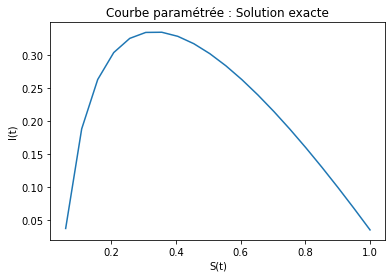

In [16]:
x = np.linspace(0.06,1,20)
y = sol_exacte_SIR(x, C0)
plt.plot(x,y)

plt.xlabel("S(t)")
plt.ylabel("I(t)")
plt.title('Courbe paramétrée : Solution exacte')
plt.show()

4-a) Tracé pour N = 101

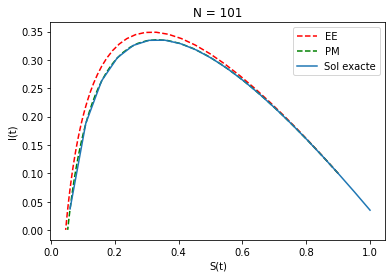

In [17]:
plt.plot(EE_SIR[0,:],EE_SIR[1,:],'r--', label='EE')
plt.plot(PM_SIR[0,:],PM_SIR[1,:],'g--',label='PM')
plt.plot(x,y,label='Sol exacte')# Plot la courbe de la solution exacte

plt.xlabel("S(t)")
plt.ylabel("I(t)")
plt.legend()
plt.title('N = 101')
plt.show()

b) N = 201

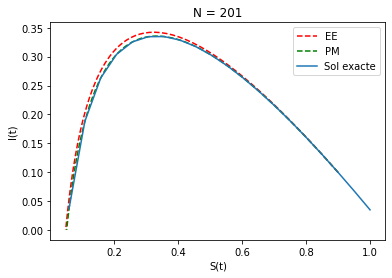

In [18]:
N = 201
temps = np.linspace(0,T,N+1)
EE_SIR2 = euler_explicite(dynamique_SIR, Y0, temps)
PM_SIR2 = point_milieu(dynamique_SIR, Y0, temps)

plt.plot(EE_SIR2[0,:],EE_SIR2[1,:],'r--', label='EE')
plt.plot(PM_SIR2[0,:],PM_SIR2[1,:],'g--',label='PM')
plt.plot(x,y,label='Sol exacte')# Plot la courbe de la solution exacte

plt.xlabel("S(t)")
plt.ylabel("I(t)")
plt.legend()
plt.title('N = 201')
plt.show()

c) N = 1001

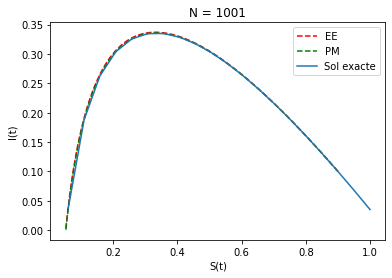

In [19]:
N = 1001
temps = np.linspace(0,T,N+1)
EE_SIR3 = euler_explicite(dynamique_SIR, Y0, temps)
PM_SIR3 = point_milieu(dynamique_SIR, Y0, temps)

plt.plot(EE_SIR3[0,:],EE_SIR3[1,:],'r--', label='EE')
plt.plot(PM_SIR3[0,:],PM_SIR3[1,:],'g--',label='PM')
plt.plot(x,y,label='Sol exacte')# Plot la courbe de la solution exacte

plt.xlabel("S(t)")
plt.ylabel("I(t)")
plt.legend()
plt.title('N = 1001')
plt.show()

#### conclusion

À partir de ces 3 tracés, on remarque encore une fois que la méthodes des points milieu est meilleur que celle d'Euler puisque même pour N=101 la courbe obtenu par la méthode des points milieu se confond avec la solution exacte.  Ensuite, on remarque comme l'on pouvait s'y attendre que l'augmentation de N nous donne une meilleure approximation de la solution exacte, car on voit que la courbe rouge, celle correspondant à Euler explicite, se rapproche de la solution exacte quand N augmente. Cela est logique d'après ce qu'on a pu voir à travers l'exercice 1, car l'augmentation de N fait diminuer le pas, noté h, qui majore l'erreur. Finalement cela confirme bien le fait que la solution est contenue dans la courbe paramétrée donnée par l'équation (2).